In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
upfile = "DOOMSDAY_Standard_Upstep.csv"
downfile = "DOOMSDAY_Standard_Downstep.csv"

up = np.loadtxt(upfile, delimiter=",", usecols=(3,4,5,6,7,8,9,10,11), skiprows=0)
ds_up = xr.Dataset(
    data_vars={
        "sst":("co2", up[2,:]),
        "cf":("co2", up[3,:]),
        "zb":("co2", up[5,:]),
        "zi":("co2", up[6,:]),
        "lhf":("co2", up[10,:]),
        "shf":("co2", up[11,:]),
        "lw_up":("co2", up[12,:]),
        "lw_down":("co2", up[14,:]),
        "sw_up":("co2", up[16,:]),
        "sw_down":("co2", up[17,:]),
        "D":("co2", up[26,:]),
        "dR_ct":("co2", up[30,:]),
        "dT_ct":("co2", up[31,:])
        }, 
    coords={"co2":up[0,:]})
ds_up = ds_up.expand_dims(upstep=[1])

down = np.loadtxt(downfile, delimiter=",", usecols=(3,4,5,6,7,8,9,10), skiprows=0)
ds_down = xr.Dataset(
    data_vars={
        "sst":("co2", down[2,:]),
        "cf":("co2", down[3,:]),
        "zb":("co2", down[5,:]),
        "zi":("co2", down[6,:]),
        "lhf":("co2", down[10,:]),
        "shf":("co2", down[11,:]),
        "lw_up":("co2", down[12,:]),
        "lw_down":("co2", down[13,:]),
        "sw_up":("co2", down[14,:]),
        "sw_down":("co2", down[15,:]),
        "D":("co2", down[23,:]),
        "dR_ct":("co2", down[27,:]),
        "dT_ct":("co2", down[28,:]),
        }, 
    coords={"co2":down[0,:]},
    )
ds_down = ds_down.expand_dims(upstep=[0])

ds = xr.concat([ds_up, ds_down], dim="upstep")
# print(ds)
# print(ds.co2.values)
# print(ds.sst.values)

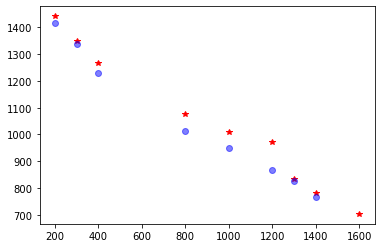

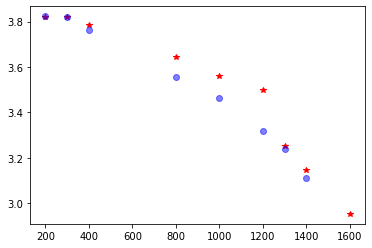

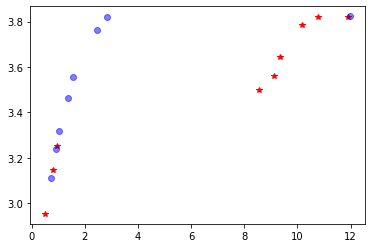

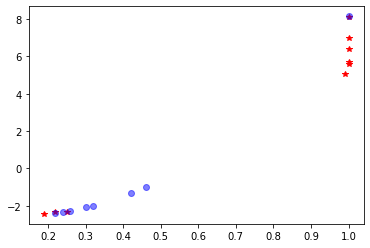

In [4]:
plt.plot(ds.co2, ds.sel(upstep=1).zi, "r*")
plt.plot(ds.co2, ds.sel(upstep=0).zi, 'bo', alpha=0.5)
plt.show()

D = 6e-6 # 1/s
ds["w_ent_diag"] = ds.D*1e-6 * ds.zi * 1e3 # mm/s
plt.plot(ds.co2, ds.sel(upstep=1).w_ent_diag, "r*")
plt.plot(ds.co2, ds.sel(upstep=0).w_ent_diag, 'bo', alpha=0.5)
plt.show()

ds["w_ent_prog"] = ds.dR_ct / ds.dT_ct
plt.plot(ds.sel(upstep=1).w_ent_prog, ds.sel(upstep=1).w_ent_diag, "r*")
plt.plot(ds.sel(upstep=0).w_ent_prog, ds.sel(upstep=0).w_ent_diag, 'bo', alpha=0.5)
plt.show()

plt.plot(ds.sel(upstep=1).cf, ds.sel(upstep=1).w_ent_prog - ds.sel(upstep=1).w_ent_diag, "r*")
plt.plot(ds.sel(upstep=0).cf, ds.sel(upstep=0).w_ent_prog - ds.sel(upstep=0).w_ent_diag, 'bo', alpha=0.5)
plt.show()

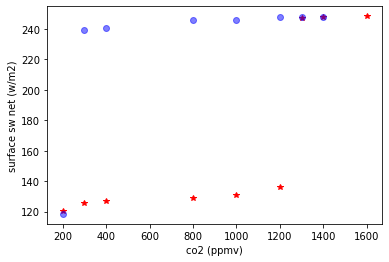

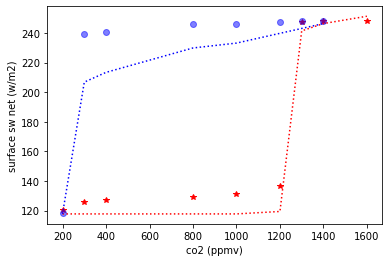

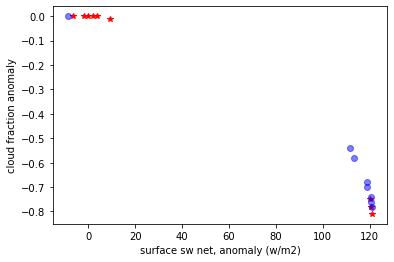

In [10]:
ds['sw_net'] = ds.sw_down - ds.sw_up
plt.plot(ds.co2, ds.sel(upstep=1).sw_net, 'r*')
plt.plot(ds.co2, ds.sel(upstep=0).sw_net, 'bo', alpha=0.5)
plt.xlabel("co2 (ppmv)")
plt.ylabel("surface sw net (w/m2)")
plt.show()

plt.plot(ds.co2, ds.sel(upstep=1).sw_net, 'r*')
plt.plot(ds.co2, ds.sel(upstep=0).sw_net, 'bo', alpha=0.5)
plt.plot(ds.co2, 471*(1 - (1-ds.sel(upstep=1).cf)*0.4 - ds.sel(upstep=1).cf*0.75), 'r:')
plt.plot(ds.co2, 471*(1 - (1-ds.sel(upstep=0).cf)*0.4 - ds.sel(upstep=0).cf*0.75), 'b:')
plt.xlabel("co2 (ppmv)")
plt.ylabel("surface sw net (w/m2)")
plt.show()

sw_net = ds.where(ds.cf < 0.5).sw_net.values.flatten()
cf = ds.where(ds.cf < 0.5).cf.values.flatten()
SW0 = ds.sel(co2=400, upstep=1).sw_net.values
CF0 = ds.sel(co2=400, upstep=1).cf.values

plt.plot(ds.sel(upstep=1).sw_net - SW0, (ds.sel(upstep=1).cf - CF0), 'r*')
plt.plot(ds.sel(upstep=0).sw_net - SW0, (ds.sel(upstep=0).cf - CF0), 'bo', alpha=0.5)
plt.xlabel("surface sw net, anomaly (w/m2)")
plt.ylabel("cloud fraction anomaly")
plt.gca().set_facecolor('w')
plt.show()